In [113]:
import numpy as np
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt
import urllib2, StringIO
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

http://stackoverflow.com/questions/1912434/how-do-i-parse-xml-in-python

In [3]:
import xml.etree.ElementTree as etree

In [31]:
html = "http://waterservices.usgs.gov/nwis/iv/?format=waterml,2.0&indent=on&sites=01613900,01615000,01616100,01620500,01621050&startDT=1990-11-01&endDT=2010-05-05&parameterCd=00060,00065"

In [34]:
html = "http://waterservices.usgs.gov/nwis/dv/?format=waterml,1.1&sites=01613900,01615000,01616100&startDT=1960-11-01&endDT=2010-05-05&parameterCd=00060,00065"

In [ ]:
response = urllib2.urlopen(html)
io_xml = StringIO.StringIO()
io_xml.write(response.read())
io_xml.seek(0)
tree = etree.parse(io_xml)
root = tree.getroot()root = tree.getroot()

In [65]:
USGSdictvals

In [109]:
response = urllib2.urlopen(html)
htmlresp = response.read()

USGSdict = xmltodict.parse(htmlresp)
f={}
for i in range(len(USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'])):
    f[USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'][i]['@name'][5:13]] = pd.DataFrame(USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'][i]['ns1:values']['ns1:value'])
g = pd.concat(f)
g.reset_index(inplace=True)
g['datetime'] = pd.to_datetime(g['@dateTime'])
g['Q_cfs'] = pd.to_numeric(g['#text'])
g.set_index('datetime',inplace=True)
g.drop([u'level_1', '#text', '@dateTime'],axis=1,inplace=True)
g.columns = ['station','qualifiers','Q_cfs']

In [97]:
g.columns

Index([u'station', u'Q_cfs', u'qualifiers'], dtype='object')

station
01613900    Axes(0.125,0.2;0.775x0.7)
01615000    Axes(0.125,0.2;0.775x0.7)
01616100    Axes(0.125,0.2;0.775x0.7)
Name: Q_cfs, dtype: object

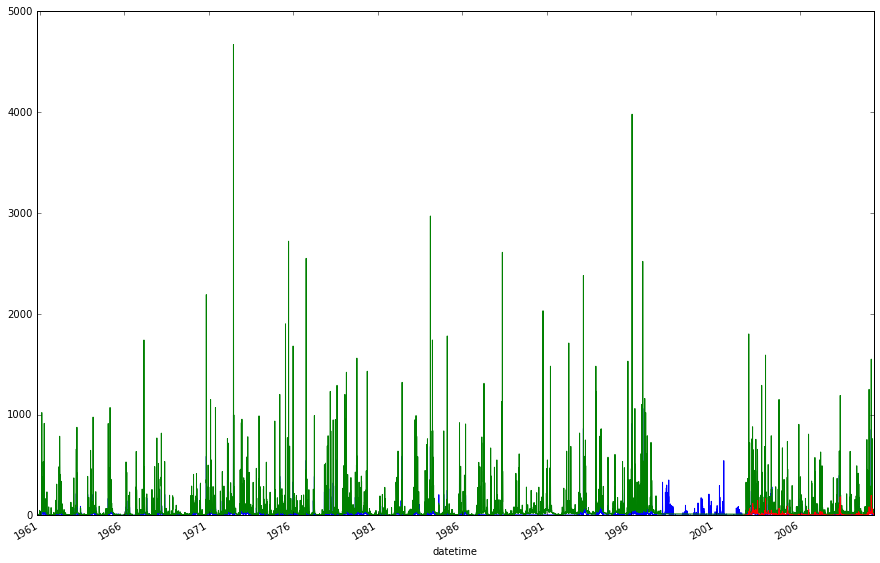

In [116]:
g.groupby(['station'])['Q_cfs'].plot()

In [82]:
g.set_index('datetime',inplace=True)

In [99]:
g['Q_cfs'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [51]:
USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'][0]['@name'][5:13]

u'01613900'

In [26]:
root[2]

<Element '{http://www.opengis.net/gml/3.2}featureMember' at 0x8264ff0>

In [ ]:
from datetime import datetime
import urllib2
import xmltodict

def getQInfo(html):
    '''
    Input
    -----
    html = location of data to be queried <http://waterservices.usgs.gov>         

    Output
    ------
    df = Pandas Dataframe containing data downloaded from USGS
    '''

    response = urllib2.urlopen(html)
    htmlresp = response.read()
    USGSdict = xmltodict.parse(htmlresp)
    f={}
    for i in range(len(USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'])):
        f[USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'][i]['@name'][5:13]] = pd.DataFrame(USGSdict['ns1:timeSeriesResponse']['ns1:timeSeries'][i]['ns1:values']['ns1:value'])
    df = pd.concat(f)
    df.reset_index(inplace=True)
    df['datetime'] = pd.to_datetime(df['@dateTime'])
    df['Q_cfs'] = pd.to_numeric(df['#text'])
    df.set_index('datetime',inplace=True)
    df.drop([u'level_1', '#text', '@dateTime'],axis=1,inplace=True)
    df.columns = ['site_no','qualifiers','values']
    return df


siteno = '403940112051401,403949112043301,403503112011401'
wlhtml = "http://waterservices.usgs.gov/nwis/gwlevels/?format=waterml,2.0&sites="+str(siteno)+"&startDT=1800-01-01&endDT="+str(datetime.today().year)+"-"+str(datetime.today().month).zfill(2)+"-"+str(datetime.today().day).zfill(2)


dict = USGSdict['gml:FeatureCollection']['gml:featureMember'][i]['wml2:Collection']['wml2:observationMember']['om:OM_Observation']['om:result']['wml2:MeasurementTimeseries']['wml2:point']
del dict[0]
date,level=[],[]
for i in range(len(dict)):
    date.append(dict[i]['wml2:MeasurementTVP']['wml2:time'])
    level.append(float(dict[i]['wml2:MeasurementTVP'][u'wml2:value']))
g = pd.DataFrame({'date':date,'level':level})
g['date'] = pd.to_datetime(g['date'])
g.set_index('date')
g['level'].plot()